In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [126]:
df = pd.read_csv('all_merged.csv', index_col=False)
df.columns.tolist()

C:\Users\17063\AppData\Local\Temp\ipykernel_21196\834589333.py:1: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('all_merged.csv', index_col=False)


['School Name',
 'Quality Score',
 'Letter Grade',
 'ZIP Code',
 'Academic Score',
 'Resources Score',
 'Equity Score',
 'Outcomes Score',
 'Strengths',
 'Areas for Improvement',
 'Neighborhoods',
 'Population(2024)',
 'Averge house price',
 'crime ',
 'crime_density',
 'School data',
 'OBJECTID',
 'ChargeId',
 'IncidentNumber',
 'ReportNumber',
 'FireArmInvolved',
 'ReportDate',
 'OccurredFromDate',
 'OccurredToDate',
 'Day_of_the_week',
 'Day_Number',
 'Part',
 'Crime_Against',
 'NibrsUcrCode',
 'NIBRS_Offense',
 'Vic_Count',
 'StreetAddress',
 'Longitude',
 'Latitude',
 'IsBiasMotivationInvolved',
 'event_watch',
 'Zone',
 'Zone_int',
 'LocationType',
 'press_release',
 'social_media',
 'Beat',
 'NhoodName',
 'DISTRICT',
 'NPU',
 'GlobalID',
 'x',
 'y']

In [127]:
df.shape

(252188, 48)

In [128]:
df.isna().sum()

School Name                      0
Quality Score                    0
Letter Grade                     0
ZIP Code                         0
Academic Score                   0
Resources Score                  0
Equity Score                     0
Outcomes Score                   0
Strengths                        0
Areas for Improvement            0
Neighborhoods                    0
Population(2024)                 0
Averge house price               0
crime                       252188
crime_density               252188
School data                 252188
OBJECTID                        50
ChargeId                        50
IncidentNumber                  50
ReportNumber                    50
FireArmInvolved                 50
ReportDate                      50
OccurredFromDate                50
OccurredToDate                  50
Day_of_the_week                 50
Day_Number                      50
Part                            50
Crime_Against                   50
NibrsUcrCode        

In [129]:
df.drop(['crime ', 'crime_density', 'School data', 'Vic_Count','StreetAddress',
         'press_release','social_media'], axis=1, inplace=True)


In [130]:
df.dropna(inplace=True)
df.isna().sum()

School Name                 0
Quality Score               0
Letter Grade                0
ZIP Code                    0
Academic Score              0
Resources Score             0
Equity Score                0
Outcomes Score              0
Strengths                   0
Areas for Improvement       0
Neighborhoods               0
Population(2024)            0
Averge house price          0
OBJECTID                    0
ChargeId                    0
IncidentNumber              0
ReportNumber                0
FireArmInvolved             0
ReportDate                  0
OccurredFromDate            0
OccurredToDate              0
Day_of_the_week             0
Day_Number                  0
Part                        0
Crime_Against               0
NibrsUcrCode                0
NIBRS_Offense               0
Longitude                   0
Latitude                    0
IsBiasMotivationInvolved    0
event_watch                 0
Zone                        0
Zone_int                    0
LocationTy

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251485 entries, 0 to 252186
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   School Name               251485 non-null  object 
 1   Quality Score             251485 non-null  float64
 2   Letter Grade              251485 non-null  object 
 3   ZIP Code                  251485 non-null  int64  
 4   Academic Score            251485 non-null  float64
 5   Resources Score           251485 non-null  float64
 6   Equity Score              251485 non-null  float64
 7   Outcomes Score            251485 non-null  float64
 8   Strengths                 251485 non-null  object 
 9   Areas for Improvement     251485 non-null  object 
 10  Neighborhoods             251485 non-null  object 
 11  Population(2024)          251485 non-null  int64  
 12  Averge house price        251485 non-null  int64  
 13  OBJECTID                  251485 non-null  float6

In [132]:
df.head()

,School Name,Quality Score,Letter Grade,ZIP Code,Academic Score,Resources Score,Equity Score,Outcomes Score,Strengths,Areas for Improvement,...,Zone,Zone_int,LocationType,Beat,NhoodName,DISTRICT,NPU,GlobalID,x,y
0,ASA HILLIARD ELEMENTARY SCHOOL,21.5,F,30344,24.0,17.0,18.0,25.0,"Academic, Outcomes","Resources, Equity",...,Zone 4,4.0,RESIDENCE_HOME,411.0,Greenbriar,11.0,R,897a1a1c-57a4-41dd-962c-37d71f8aa801,-84.495048,33.668151
2,ASA HILLIARD ELEMENTARY SCHOOL,21.5,F,30344,24.0,17.0,18.0,25.0,"Academic, Outcomes","Resources, Equity",...,Zone 4,4.0,RESIDENCE_HOME,410.0,Campbellton Road,11.0,R,054a5ef1-16ff-4005-adbc-feaaf2921131,-84.459940,33.699990
3,ASA HILLIARD ELEMENTARY SCHOOL,21.5,F,30344,24.0,17.0,18.0,25.0,"Academic, Outcomes","Resources, Equity",...,Zone 4,4.0,RESIDENCE_HOME,411.0,Greenbriar,11.0,R,ab37727b-0716-4e6d-9276-1f8a853b3e7c,-84.490358,33.684707
4,ASA HILLIARD ELEMENTARY SCHOOL,21.5,F,30344,24.0,17.0,18.0,25.0,"Academic, Outcomes","Resources, Equity",...,Zone 4,4.0,RESIDENCE_HOME,410.0,Campbellton Road,11.0,R,c647ee86-18a5-480e-98ef-ed55a7f92321,-84.459940,33.699990
8,ATLANTA CLASSICAL ACADEMY,30.3,C,30305,27.0,49.0,8.0,50.0,"Resources, Outcomes","Academic, Equity",...,Zone 2,2.0,PARKING_DROP_LOT_GARAGE,208.0,Buckhead Forest,7.0,B,79e05ac4-97e7-4f4f-8b71-1125cfb87df0,-84.378911,33.844446


In [133]:
df.to_csv('justalook.csv')

I'm sorry I exported the file to excel to drop all the columns I didn't want. It was easier with due to the scope.

In [134]:
df = pd.read_csv('justalook_cleaned.csv')
df.head()

,ZIP Code,Population(2024),Quality Score,Letter Grade,Areas for Improvement,Academic Score,Resources Score,Equity Score,Outcomes Score,Strengths,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,30344,35365,21.5,F,"Resources, Equity",24.0,17.0,18.0,25,"Academic, Outcomes",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30344,35365,21.5,F,"Resources, Equity",24.0,17.0,18.0,25,"Academic, Outcomes",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30344,35365,21.5,F,"Resources, Equity",24.0,17.0,18.0,25,"Academic, Outcomes",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30344,35365,21.5,F,"Resources, Equity",24.0,17.0,18.0,25,"Academic, Outcomes",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30305,29173,30.3,C,"Academic, Equity",27.0,49.0,8.0,50,"Resources, Outcomes",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
df.columns.tolist()

['ZIP Code',
 'Population(2024)',
 'Quality Score',
 'Letter Grade',
 'Areas for Improvement',
 'Academic Score',
 'Resources Score',
 'Equity Score',
 'Outcomes Score',
 'Strengths',
 'Averge house price',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Unnamed: 29',
 'Unnamed: 30',
 'Unnamed: 31',
 'Unnamed: 32',
 'Unnamed: 33',
 'Unnamed: 34',
 'Unnamed: 35',
 'Unnamed: 36',
 'Unnamed: 37',
 'Unnamed: 38',
 'Unnamed: 39']

In [136]:
df.dropna(axis=1, how='all', inplace=True)
df.head()

,ZIP Code,Population(2024),Quality Score,Letter Grade,Areas for Improvement,Academic Score,Resources Score,Equity Score,Outcomes Score,Strengths,Averge house price
0,30344,35365,21.5,F,"Resources, Equity",24.0,17.0,18.0,25,"Academic, Outcomes",245615
1,30344,35365,21.5,F,"Resources, Equity",24.0,17.0,18.0,25,"Academic, Outcomes",245615
2,30344,35365,21.5,F,"Resources, Equity",24.0,17.0,18.0,25,"Academic, Outcomes",245615
3,30344,35365,21.5,F,"Resources, Equity",24.0,17.0,18.0,25,"Academic, Outcomes",245615
4,30305,29173,30.3,C,"Academic, Equity",27.0,49.0,8.0,50,"Resources, Outcomes",686135


In [137]:
# Count duplicates by rows and store in a new column
df['crime count'] = df.groupby(df.columns.tolist())['ZIP Code'].transform('count')
df.head()

,ZIP Code,Population(2024),Quality Score,Letter Grade,Areas for Improvement,Academic Score,Resources Score,Equity Score,Outcomes Score,Strengths,Averge house price,crime count
0,30344,35365,21.5,F,"Resources, Equity",24.0,17.0,18.0,25,"Academic, Outcomes",245615,4
1,30344,35365,21.5,F,"Resources, Equity",24.0,17.0,18.0,25,"Academic, Outcomes",245615,4
2,30344,35365,21.5,F,"Resources, Equity",24.0,17.0,18.0,25,"Academic, Outcomes",245615,4
3,30344,35365,21.5,F,"Resources, Equity",24.0,17.0,18.0,25,"Academic, Outcomes",245615,4
4,30305,29173,30.3,C,"Academic, Equity",27.0,49.0,8.0,50,"Resources, Outcomes",686135,1784


In [138]:
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)
df.drop_duplicates(inplace=True)
num_duplicates = df.duplicated().sum()
print("New Number of duplicate rows:", num_duplicates)
df.head()



Number of duplicate rows: 251378
New Number of duplicate rows: 0


,ZIP Code,Population(2024),Quality Score,Letter Grade,Areas for Improvement,Academic Score,Resources Score,Equity Score,Outcomes Score,Strengths,Averge house price,crime count
0,30344,35365,21.5,F,"Resources, Equity",24.0,17.0,18.0,25,"Academic, Outcomes",245615,4
4,30305,29173,30.3,C,"Academic, Equity",27.0,49.0,8.0,50,"Resources, Outcomes",686135,1784
1788,30315,34327,23.7,D,"Academic, Equity",24.0,25.0,4.0,50,"Resources, Outcomes",251677,2967
4755,30316,33625,23.6,D,"Resources, Equity",26.0,21.0,3.0,50,"Academic, Outcomes",407458,1509
6264,30311,33568,20.8,F,"Resources, Equity",25.0,14.0,8.0,38,"Academic, Outcomes",250119,2557


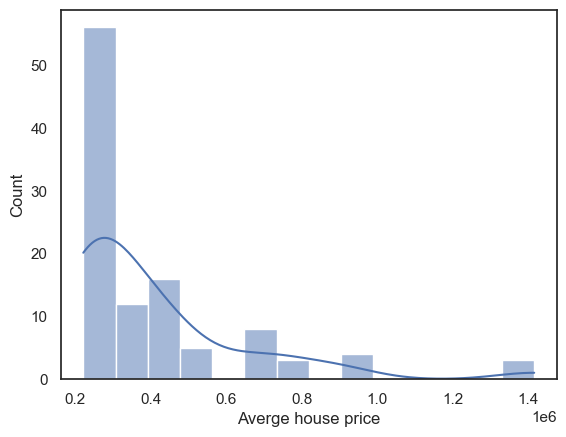

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Averge house price'], kde=True)
plt.show()

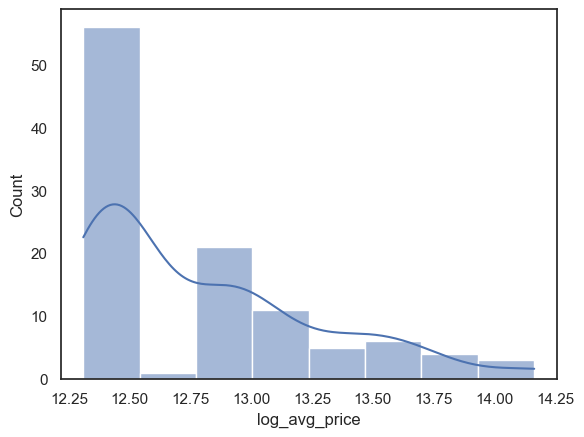

In [140]:
# Transform the column using log1p
df['log_avg_price'] = np.log1p(df['Averge house price'])
sns.histplot(df['log_avg_price'], kde=True)
plt.show()

In [141]:
# Using median as a binary split because data is extremely skewed
# Find the median
median_price = df['Averge house price'].median()

# Create a binary column: 1 if above median, 0 if below or equal
df['price_binary'] = (df['Averge house price'] > median_price).astype(int)
df.head()


,ZIP Code,Population(2024),Quality Score,Letter Grade,Areas for Improvement,Academic Score,Resources Score,Equity Score,Outcomes Score,Strengths,Averge house price,crime count,log_avg_price,price_binary
0,30344,35365,21.5,F,"Resources, Equity",24.0,17.0,18.0,25,"Academic, Outcomes",245615,4,12.411525,0
4,30305,29173,30.3,C,"Academic, Equity",27.0,49.0,8.0,50,"Resources, Outcomes",686135,1784,13.438831,1
1788,30315,34327,23.7,D,"Academic, Equity",24.0,25.0,4.0,50,"Resources, Outcomes",251677,2967,12.435906,0
4755,30316,33625,23.6,D,"Resources, Equity",26.0,21.0,3.0,50,"Academic, Outcomes",407458,1509,12.917696,1
6264,30311,33568,20.8,F,"Resources, Equity",25.0,14.0,8.0,38,"Academic, Outcomes",250119,2557,12.429696,0


In [142]:
# Clustering Zip Codes to identify groups similar in price and crime
from sklearn.preprocessing import StandardScaler

zip_summary = df.groupby('ZIP Code')[['Averge house price', 'crime count']].mean()
scaler = StandardScaler()
zip_scaled = scaler.fit_transform(zip_summary)


In [143]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
zip_summary['zip_cluster'] = kmeans.fit_predict(zip_scaled)


In [144]:
# Create the mapping ZIP → cluster
zip_to_cluster = zip_summary['zip_cluster'].to_dict()

# Add cluster label to main df
df['zip_cluster'] = df['ZIP Code'].map(zip_to_cluster)


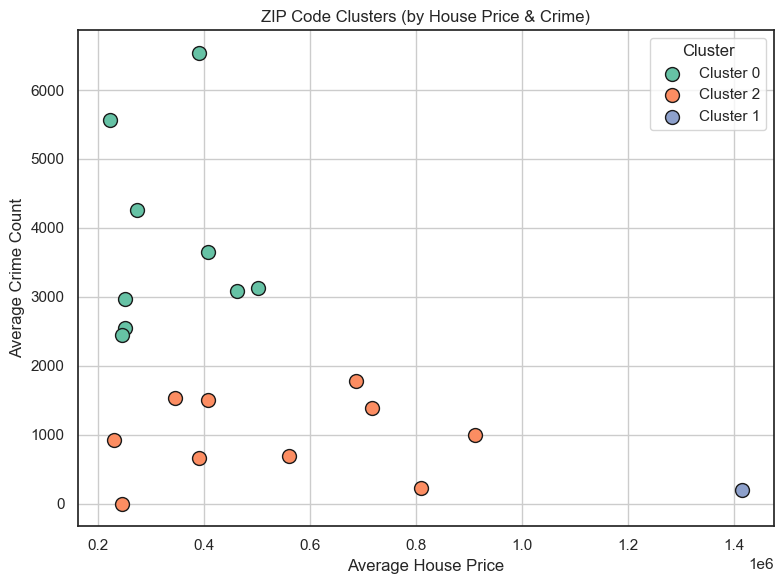

In [145]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

colors = ['#66c2a5', '#fc8d62', '#8da0cb'] 
cluster_labels = zip_summary['zip_cluster'].unique()

# Create scatter plot
for cluster, color in zip(cluster_labels, colors):
    subset = zip_summary[zip_summary['zip_cluster'] == cluster]
    plt.scatter(subset['Averge house price'], subset['crime count'],
                s=100, edgecolor='k', color=color, label=f'Cluster {cluster}')

# Plot aesthetics
plt.xlabel('Average House Price')
plt.ylabel('Average Crime Count')
plt.title('ZIP Code Clusters (by House Price & Crime)')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()



In [146]:
df.drop(columns=['Averge house price','log_avg_price','ZIP Code'], inplace=True)
df.head()
df.columns.tolist()

['Population(2024)',
 'Quality Score',
 'Letter Grade',
 'Areas for Improvement',
 'Academic Score',
 'Resources Score',
 'Equity Score',
 'Outcomes Score',
 'Strengths',
 'crime count',
 'price_binary',
 'zip_cluster']

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 0 to 244948
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Population(2024)       107 non-null    int64  
 1   Quality Score          107 non-null    float64
 2   Letter Grade           107 non-null    object 
 3   Areas for Improvement  107 non-null    object 
 4   Academic Score         107 non-null    float64
 5   Resources Score        107 non-null    float64
 6   Equity Score           107 non-null    float64
 7   Outcomes Score         107 non-null    int64  
 8   Strengths              107 non-null    object 
 9   crime count            107 non-null    int64  
 10  price_binary           107 non-null    int64  
 11  zip_cluster            107 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 10.9+ KB


In [148]:
df.head()

,Population(2024),Quality Score,Letter Grade,Areas for Improvement,Academic Score,Resources Score,Equity Score,Outcomes Score,Strengths,crime count,price_binary,zip_cluster
0,35365,21.5,F,"Resources, Equity",24.0,17.0,18.0,25,"Academic, Outcomes",4,0,2
4,29173,30.3,C,"Academic, Equity",27.0,49.0,8.0,50,"Resources, Outcomes",1784,1,2
1788,34327,23.7,D,"Academic, Equity",24.0,25.0,4.0,50,"Resources, Outcomes",2967,0,0
4755,33625,23.6,D,"Resources, Equity",26.0,21.0,3.0,50,"Academic, Outcomes",1509,1,2
6264,33568,20.8,F,"Resources, Equity",25.0,14.0,8.0,38,"Academic, Outcomes",2557,0,0


In [149]:
# Define the target
y = df['price_binary']

# Define the features (everything except the target)
X = df.drop(columns=['price_binary'])


In [150]:
from sklearn.preprocessing import StandardScaler

# Identify all numeric columns
numeric_cols = X.select_dtypes(include='number').columns

# Exclude 'ZIP Code' and 'price_binary'
cols_to_scale = numeric_cols.drop(['zip_cluster'])

# Initialize the scaler
scaler = StandardScaler()

# Scale only the selected columns
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])



In [151]:
X[numeric_cols].describe()

,Population(2024),Quality Score,Academic Score,Resources Score,Equity Score,Outcomes Score,crime count,zip_cluster
count,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,1.070000e+02,107.000000
mean,9.130806e-17,7.574419e-17,2.038868e-16,1.525260e-16,-5.187958e-17,-1.597891e-16,-2.490220e-17,0.906542
std,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,1.004706e+00,0.986060
min,-1.951967e+00,-1.613386e+00,-1.175408e+00,-1.351072e+00,-1.578087e+00,-2.124776e+00,-1.274691e+00,0.000000
25%,-5.712596e-01,-7.506973e-01,-7.163985e-01,-6.159971e-01,-5.536868e-01,-5.589976e-01,-7.710790e-01,0.000000
50%,1.775287e-01,-2.425381e-01,-2.573887e-01,-2.484598e-01,-2.122200e-01,2.552073e-01,5.740900e-02,0.000000
75%,2.442733e-01,5.019743e-01,2.016211e-01,2.415899e-01,4.707136e-01,2.552073e-01,3.350204e-01,2.000000
max,2.536366e+00,3.775465e+00,4.791719e+00,4.774550e+00,4.141482e+00,3.386765e+00,2.274497e+00,2.000000


In [152]:
# Automatically one-hot encode all object (string) columns
X = pd.get_dummies(X, drop_first=True)
X.head()

,Population(2024),Quality Score,Academic Score,Resources Score,Equity Score,Outcomes Score,crime count,zip_cluster,Letter Grade_B,Letter Grade_C,...,Areas for Improvement_Outcomes,"Areas for Improvement_Resources, Equity","Areas for Improvement_Resources, Outcomes","Strengths_Academic, Outcomes","Strengths_Academic, Resources","Strengths_Academic, Resources, Equity","Strengths_Academic, Resources, Outcomes","Strengths_Equity, Outcomes","Strengths_Resources, Equity","Strengths_Resources, Outcomes"
0,0.335552,-0.573432,-0.257389,-0.370972,-0.041487,-0.558998,-1.274691,2,False,False,...,False,True,False,True,False,False,False,False,False,False
4,-0.208957,1.506475,0.431126,3.549425,-0.895154,1.006781,-0.307669,2,False,True,...,False,False,False,False,False,False,False,False,False,True
1788,0.244273,-0.053456,-0.257389,0.609127,-1.236620,1.006781,0.335020,0,False,False,...,False,False,False,False,False,False,False,False,False,True
4755,0.182541,-0.077091,0.201621,0.119077,-1.321987,1.006781,-0.457068,2,False,False,...,False,True,False,True,False,False,False,False,False,False
6264,0.177529,-0.738880,-0.027884,-0.738509,-0.895154,0.255207,0.112279,0,False,False,...,False,True,False,True,False,False,False,False,False,False


In [153]:
# Set the threshold
threshold = 0.99995
n_rows = len(X)

# Identify low-variability columns
low_variability_cols = [
    col for col in X.columns
    if X[col].value_counts(normalize=True).iloc[0] > threshold
]

# Drop them
X.drop(columns=low_variability_cols, inplace=True)

# print which columns were removed
print("Dropped columns due to low variability:")
print(low_variability_cols)

Dropped columns due to low variability:
[]


In [154]:
X.shape

(107, 26)

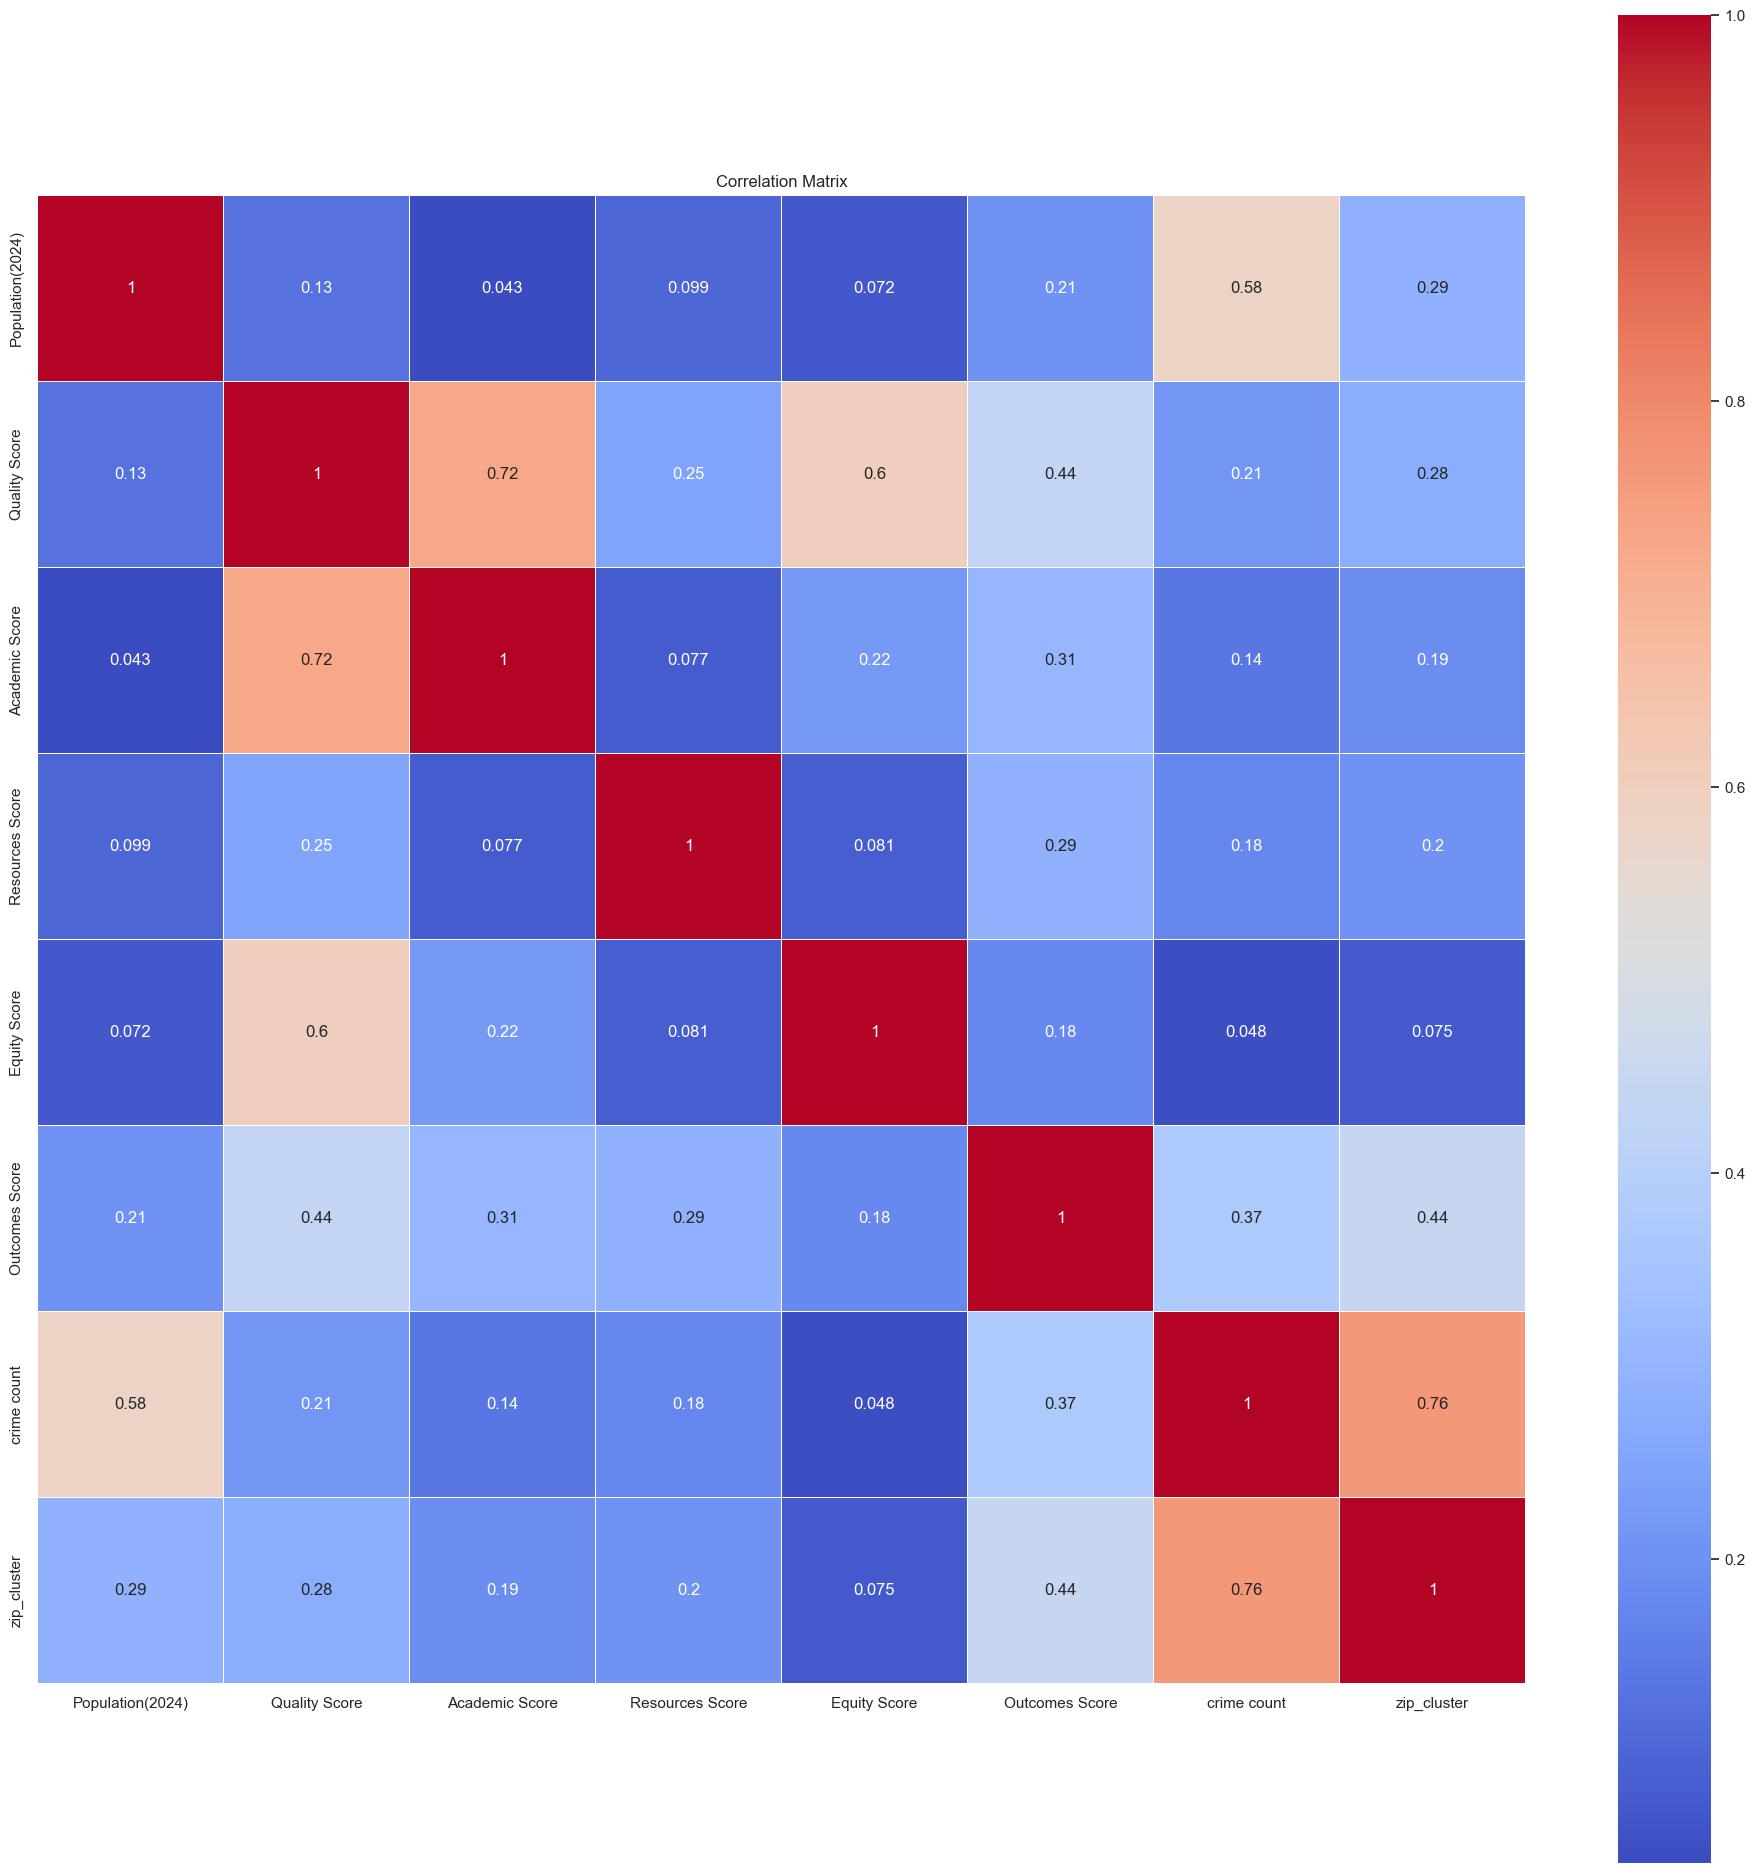

In [155]:
# Compute absolute correlation matrix for numerical columns
numeric_df = X.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr().abs()

# Plot heatmap
plt.figure(figsize=(24, 24))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [156]:
# Compute correlation matrix
corr_matrix = X.corr().abs()

# Create a mask to ignore the diagonal and lower triangle
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > 0.70
high_corr_pairs = [(col1, col2, corr_matrix.loc[col1, col2])
                   for col1 in upper.columns
                   for col2 in upper.index
                   if upper.loc[col2, col1] > 0.85]

# Display strongly correlated pairs
for col1, col2, corr in high_corr_pairs:
    print(f"{col1} ↔ {col2}: {corr:.2f}")


Strengths_Academic, Outcomes ↔ Areas for Improvement_Resources, Equity: 1.00
Strengths_Academic, Resources ↔ Areas for Improvement_Equity, Outcomes: 1.00
Strengths_Academic, Resources, Equity ↔ Areas for Improvement_Outcomes: 1.00
Strengths_Academic, Resources, Outcomes ↔ Areas for Improvement_Equity: 1.00
Strengths_Equity, Outcomes ↔ Areas for Improvement_Academic, Resources: 1.00
Strengths_Resources, Equity ↔ Areas for Improvement_Academic, Outcomes: 1.00


In [157]:
# Track features to drop (the second of each pair)
to_drop = set([col2 for _, col2, _ in high_corr_pairs])

# Drop them from X
X = X.drop(columns=to_drop)

# Report what was dropped
print("Dropped due to high correlation:")
print(to_drop)


Dropped due to high correlation:
{'Areas for Improvement_Equity, Outcomes', 'Areas for Improvement_Outcomes', 'Areas for Improvement_Academic, Outcomes', 'Areas for Improvement_Resources, Equity', 'Areas for Improvement_Equity', 'Areas for Improvement_Academic, Resources'}


In [158]:
from sklearn.decomposition import PCA

# Step 1: Initialize PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance (or set an exact number like 10)

# Step 2: Fit and transform your features
X_pca = pca.fit_transform(X)

# Step 3: Check shape and explained variance
print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)


Original shape: (107, 20)
Reduced shape: (107, 8)
Explained variance ratio: [0.31244294 0.21602899 0.13875973 0.10469133 0.06699292 0.05595897
 0.03717336 0.01805733]


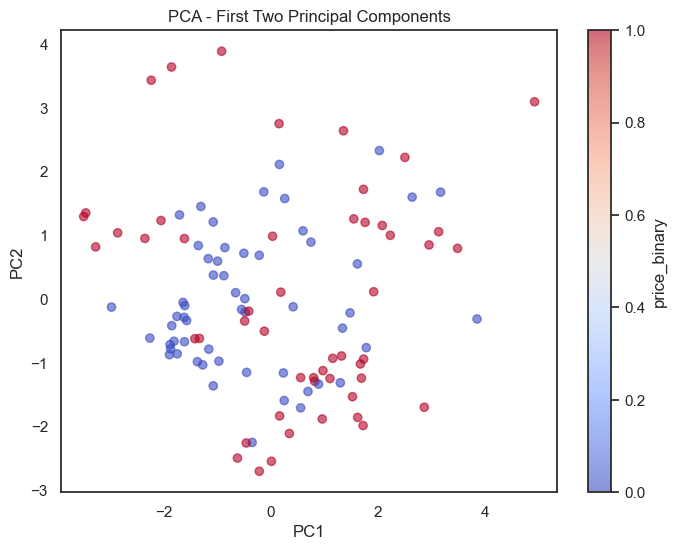

In [159]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - First Two Principal Components')
plt.colorbar(label='price_binary')
plt.show()


c:\Users\17063\OneDrive\Fundamentals of Data Science\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


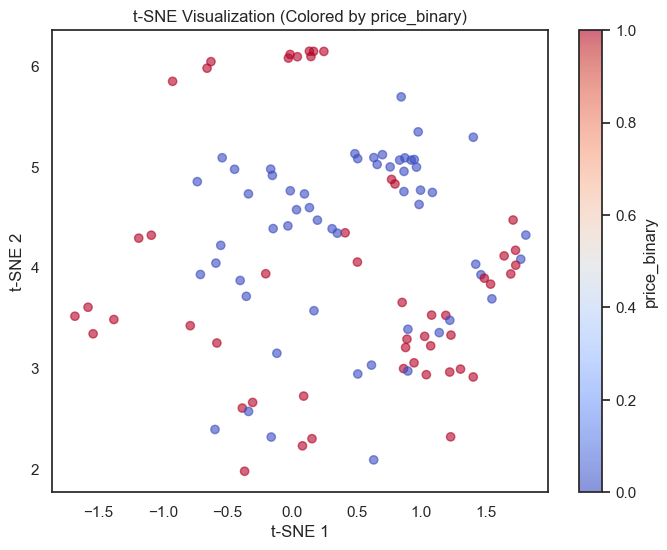

In [160]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Optional: Reduce dimensions first with PCA to speed up t-SNE
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X)

# Run t-SNE (can take a minute depending on data size)
tsne = TSNE(n_components=2, random_state=42, perplexity=75, n_iter=1000)
X_tsne = tsne.fit_transform(X_reduced)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.title("t-SNE Visualization (Colored by price_binary)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar(label='price_binary')
plt.show()


## PCA and t-SNE do not seem to have meaningful clusters. Tried many different t-SNE perplexities

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train/test split (80% train, 20% test), stratified by the target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
# Fit model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[10  2]
 [ 3  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.78      0.70      0.74        10

    accuracy                           0.77        22
   macro avg       0.77      0.77      0.77        22
weighted avg       0.77      0.77      0.77        22



In [162]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print(classification_report(y_test, rf.predict(X_test)))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.90      0.95        10

    accuracy                           0.95        22
   macro avg       0.96      0.95      0.95        22
weighted avg       0.96      0.95      0.95        22



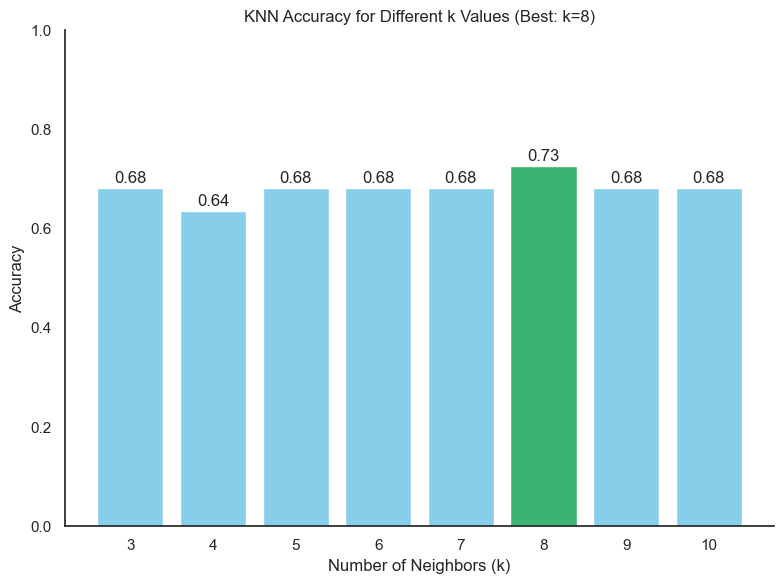

In [163]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

 # Step 1: Evaluate accuracy for each k
k_values = [3, 4, 5, 6, 7, 8, 9, 10]
accuracy_results = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_results[k] = accuracy_score(y_test, y_pred)

# Step 2: Convert to DataFrame
acc_df = pd.DataFrame(list(accuracy_results.items()), columns=['k', 'Accuracy'])

# Step 3: Identify best k
best_k = acc_df.loc[acc_df['Accuracy'].idxmax(), 'k']

# Step 4: Set bar colors (green for best, blue otherwise)
bar_colors = ['mediumseagreen' if k == best_k else 'skyblue' for k in acc_df['k']]

# Step 5: Plot with Seaborn style + matplotlib colors
sns.set(style='white')
plt.figure(figsize=(8, 6))
bars = plt.bar(acc_df['k'], acc_df['Accuracy'], color=bar_colors)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01,
             f"{height:.2f}", ha='center')

# Style
plt.title(f"KNN Accuracy for Different k Values (Best: k={int(best_k)})")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
sns.despine()
plt.tight_layout()
plt.show()

In [164]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
print(classification_report(y_test, knn.predict(X_test)))


              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.67      0.80      0.73        10

    accuracy                           0.73        22
   macro avg       0.73      0.73      0.73        22
weighted avg       0.74      0.73      0.73        22



In [165]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create a simple neural network
mlp = MLPClassifier(
    hidden_layer_sizes=(32, 16),  # two hidden layers
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

# Train the model
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[9 3]
 [2 8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.73      0.80      0.76        10

    accuracy                           0.77        22
   macro avg       0.77      0.78      0.77        22
weighted avg       0.78      0.77      0.77        22



In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=8),
    'Neural Network': MLPClassifier(
    hidden_layer_sizes=(32, 16),  # two hidden layers
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)
}


In [167]:
# Store F1 scores
f1_scores = {}

# Train each model and compute F1
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred)
    f1_scores[name] = score

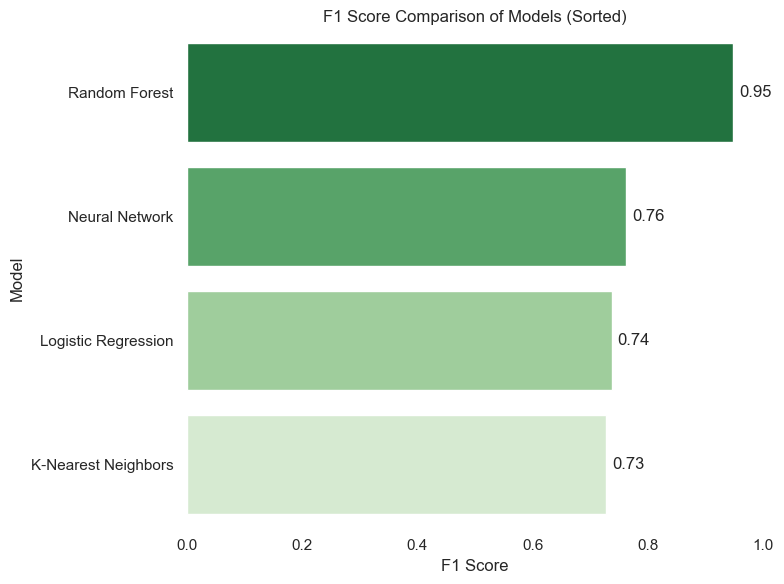

In [168]:
# Sort the F1 scores
sorted_f1 = dict(sorted(f1_scores.items(), key=lambda item: item[1], reverse=True))

# Convert to DataFrame for seaborn
import pandas as pd
f1_df = pd.DataFrame(list(sorted_f1.items()), columns=['Model', 'F1 Score'])

# Set style
sns.set_theme(style='white') 

# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='F1 Score', y='Model', hue='Model', data=f1_df, palette='Greens_r', legend=False)

# Add text labels
for i, (score, model) in enumerate(zip(f1_df['F1 Score'], f1_df['Model'])):
    ax.text(score + 0.01, i, f"{score:.2f}", va='center')

# Style
ax.set_title("F1 Score Comparison of Models (Sorted)")
sns.despine(left=True, bottom=True)  # Remove lines
plt.xlim(0, 1)
plt.tight_layout()
plt.show()



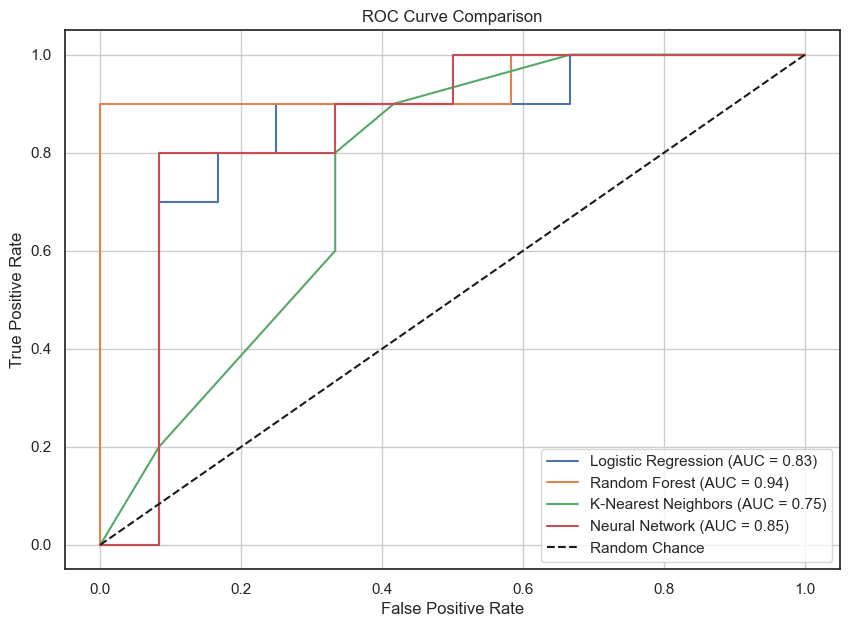

In [169]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)

    # Get predicted probabilities (use [:,1] for positive class)
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        # Some models like SVM use decision_function
        y_probs = model.decision_function(X_test)

    # ROC components
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc = roc_auc_score(y_test, y_probs)

    # Plot
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Add diagonal and labels
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



In [170]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X, y, cv=5)
print("Cross-validated accuracy scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validated accuracy scores: [0.86363636 0.81818182 0.76190476 0.76190476 0.71428571]
Mean accuracy: 0.783982683982684


## Running models after Step-forward feature selection

In [171]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score
# Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Step-forward feature selection
sfs = SequentialFeatureSelector(
    estimator=logreg,
    n_features_to_select=4,
    direction='forward',
    scoring=make_scorer(f1_score),
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1
)

sfs.fit(X, y)

# Get selected features
selected_features = X.columns[sfs.get_support()].tolist()
print("Selected features:", selected_features)

Selected features: ['Outcomes Score', 'crime count', 'zip_cluster', 'Letter Grade_D']


In [172]:
X_train, X_test, y_train, y_test = train_test_split(
    X[selected_features], y, test_size=0.2, stratify=y, random_state=42
)


In [173]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=8),
    'Neural Network': MLPClassifier(
    hidden_layer_sizes=(32, 16),  # two hidden layers
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)
}


In [174]:
# Store F1 scores
f1_scores = {}

# Train each model and compute F1
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred)
    f1_scores[name] = score

c:\Users\17063\OneDrive\Fundamentals of Data Science\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


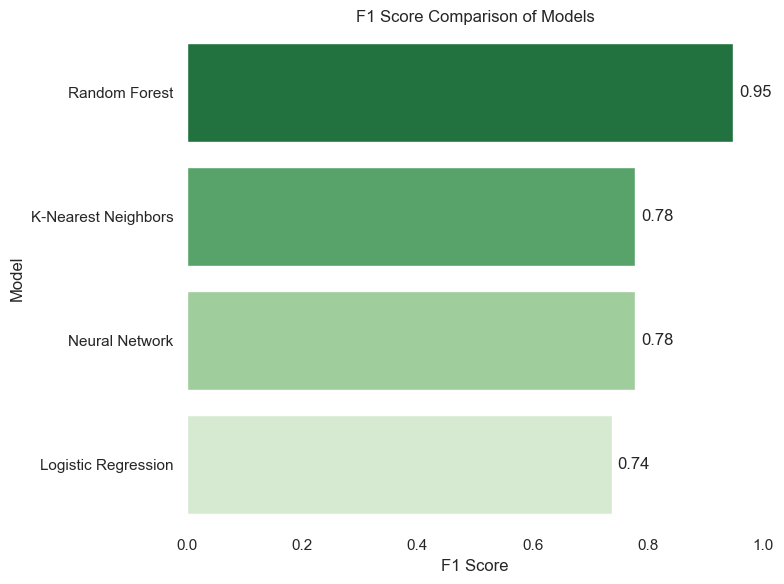

In [175]:
# Sort the F1 scores
sorted_f1 = dict(sorted(f1_scores.items(), key=lambda item: item[1], reverse=True))

# Convert to DataFrame for seaborn
import pandas as pd
f1_df = pd.DataFrame(list(sorted_f1.items()), columns=['Model', 'F1 Score'])

# Set style
sns.set_theme(style='white') 

# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='F1 Score', y='Model', hue='Model', data=f1_df, palette='Greens_r', legend=False)

# Add text labels
for i, (score, model) in enumerate(zip(f1_df['F1 Score'], f1_df['Model'])):
    ax.text(score + 0.01, i, f"{score:.2f}", va='center')

# Style
ax.set_title("F1 Score Comparison of Models")
sns.despine(left=True, bottom=True)  # Remove lines
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


## Trying Models after step-backward feature selection

In [176]:
# Step-backward feature selection
sfs_backward = SequentialFeatureSelector(
    estimator=logreg,
    n_features_to_select=4,
    direction='backward',
    scoring=make_scorer(f1_score),
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1
)

# Fit the selector
sfs_backward.fit(X, y)

# Get the selected feature names
selected_features = X.columns[sfs_backward.get_support()].tolist()
print("Selected features:", selected_features)
#they were the same

Selected features: ['Outcomes Score', 'crime count', 'zip_cluster', 'Strengths_Resources, Outcomes']


In [177]:
X_train, X_test, y_train, y_test = train_test_split(
    X[selected_features], y, test_size=0.2, stratify=y, random_state=42
)


In [178]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=8),
    'Neural Network': MLPClassifier(
    hidden_layer_sizes=(32, 16),  # two hidden layers
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)
}


In [179]:
# Store F1 scores
f1_scores = {}

# Train each model and compute F1
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred)
    f1_scores[name] = score

c:\Users\17063\OneDrive\Fundamentals of Data Science\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


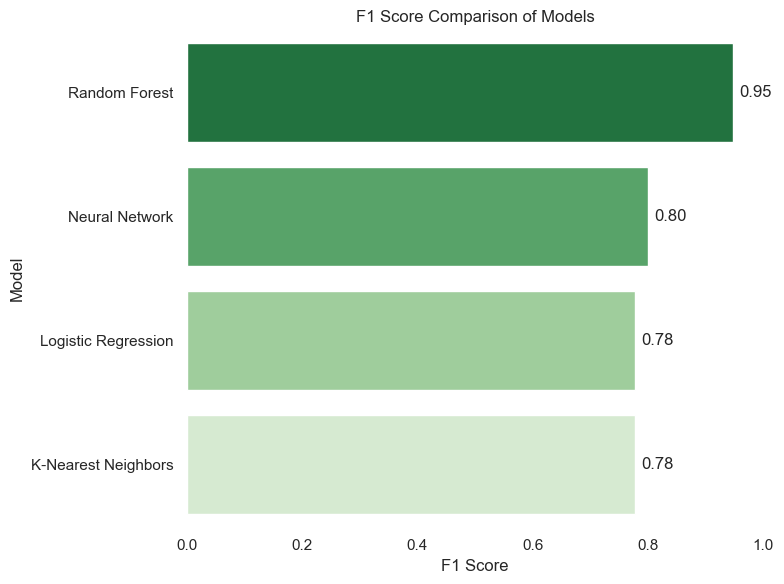

In [180]:
# Sort the F1 scores
sorted_f1 = dict(sorted(f1_scores.items(), key=lambda item: item[1], reverse=True))

# Convert to DataFrame for seaborn
import pandas as pd
f1_df = pd.DataFrame(list(sorted_f1.items()), columns=['Model', 'F1 Score'])

# Set style
sns.set_theme(style='white') 

# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='F1 Score', y='Model', hue='Model', data=f1_df, palette='Greens_r', legend=False)

# Add text labels
for i, (score, model) in enumerate(zip(f1_df['F1 Score'], f1_df['Model'])):
    ax.text(score + 0.01, i, f"{score:.2f}", va='center')

# Style
ax.set_title("F1 Score Comparison of Models")
sns.despine(left=True, bottom=True)  # Remove lines
plt.xlim(0, 1)
plt.tight_layout()
plt.show()
